# Difference between builds

*This notebook explores the differences between the three builds*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5. This notebook explores the differences between the three builds by comparing these anchor specimen between the builds.

<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import my_functions as func
import my_plot as myplt

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Dependencies: Function from "my_functions.py" which require the files "prep_data.pkl" and "layout_data.pkl".

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

---

## Cylindricity

---

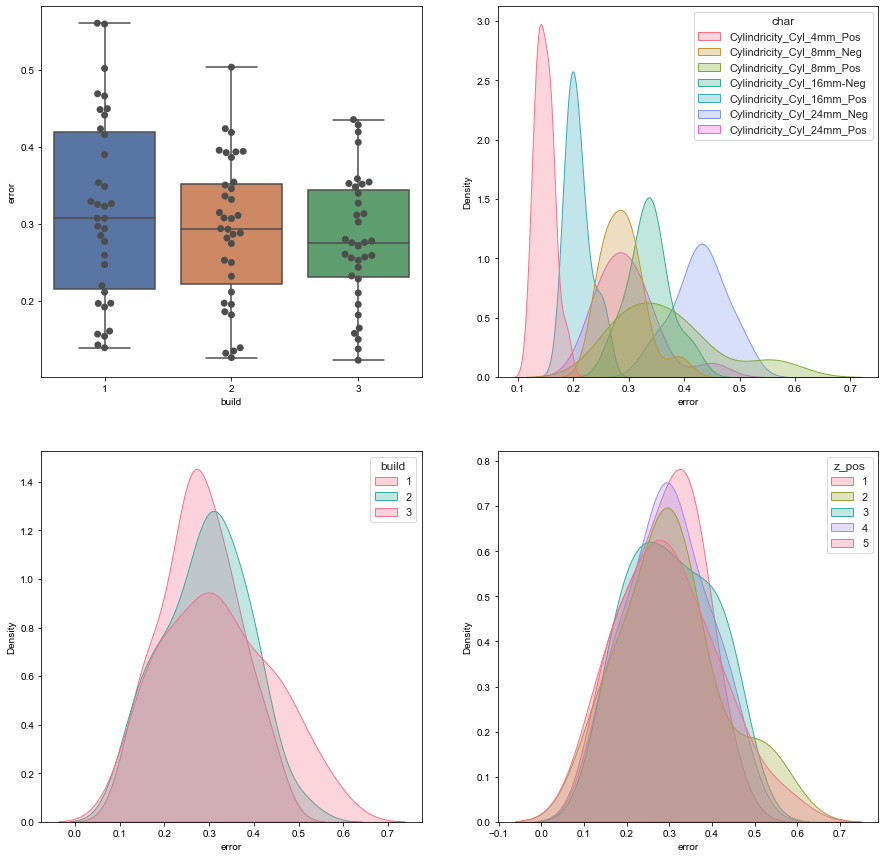

In [5]:
"""
Get an overview of the cylindricity in different builds using the anchor specimens at position (2,3).

"""


## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=False)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot: Boxplot with an overlay of swarmplot to show data points
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3', size=7)

# 2nd plot: Kernel density estimation for the different diameters
sns.kdeplot(ax=axes[0, 1], data=df, x='error', hue='char', fill=True, alpha=.3, palette="husl")

#3rd plot: Kernel density estimation for the different builds
sns.kdeplot(ax=axes[1, 0], data=df, x='error', hue='build', fill=True, alpha=.3, palette="husl")

#4th plot: Kernel density estimation for the different z-levels
sns.kdeplot(ax=axes[1, 1], data=df, x='error', hue='z_pos', fill=True, alpha=.3, palette="husl")


# Save figure
# plt.savefig('plots/Cylindricity_overview.png', dpi=300, transparent=False, bbox_inches='tight')

# Display plot
plt.show()

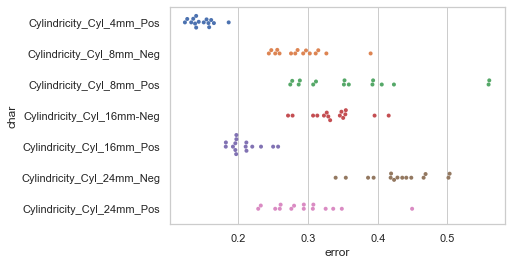

In [6]:
"""
Swarmplot to compare the different cylinders regardless of build.

PS: Only anchor specimens in position (2,3)

"""

# Swarmplot using Seaborn
sns.swarmplot(data=df, y='char', x='error', size=4)


# Display plot
plt.show()

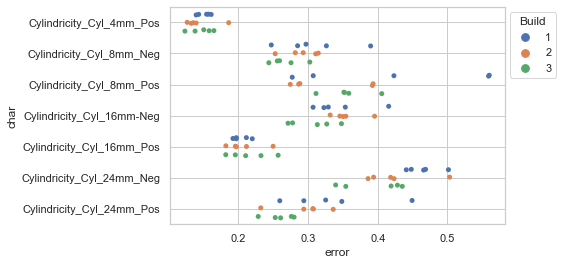

In [7]:
"""
Plot the cylinders and enable comparison of builds

PS: Only anchor specimens in position (2,3)

"""

# Stripplot using seaborn
ax = sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)

# Set grid on y-axis
ax.grid(axis='y')

# Move legend outside plot area and add title
ax.legend(loc='upper left', bbox_to_anchor=(1,1), title="Build")

# Display plot
plt.show()

---

## Flatness

---

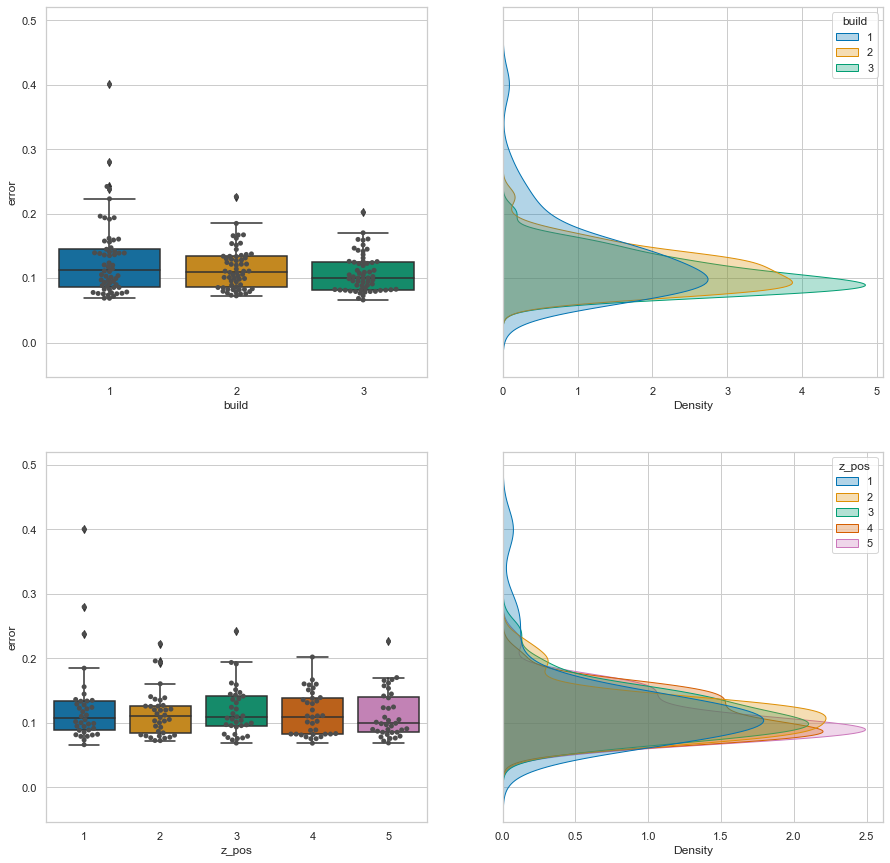

In [8]:
"""
Comparison of all planes of anchor specimen at position (2,3).

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot: Boxplot of the builds with an overlay of swarmplot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot: Kernel Density Estimation of the different builds
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot: Boxplot of the z-levels with an overlay of swarmplot
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot: Kernel Density Estimation of the different z-levels
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


# Display plot
plt.show()

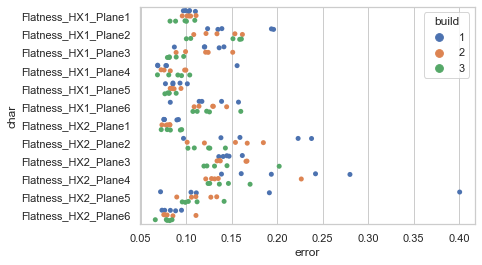

In [9]:
"""
Plot all planes of HX1 and HX2 to enable comparison of builds

PS: Only anchor specimens in position (2,3)

"""

# Stripplot using Seaborn
sns.stripplot(data=df, y='char', x='error', hue='build', dodge=True)

# Display plot
plt.show()

In [10]:
"""
T-test for anchors in position (2,3) with regards to build.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',
         'Flatness_HX1_Plane2',
         'Flatness_HX1_Plane3',
         'Flatness_HX1_Plane4',
         'Flatness_HX1_Plane5',
         'Flatness_HX1_Plane6',
         'Flatness_HX2_Plane1',
         'Flatness_HX2_Plane2',
         'Flatness_HX2_Plane3',
         'Flatness_HX2_Plane4',
         'Flatness_HX2_Plane5',
         'Flatness_HX2_Plane6']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')

# Display result from T-test
p_vals

,1,2,3
1,NaN,0.108352,0.015306
2,0.108352,NaN,0.215064
3,0.015306,0.215064,NaN


---

## Vertical planes

---

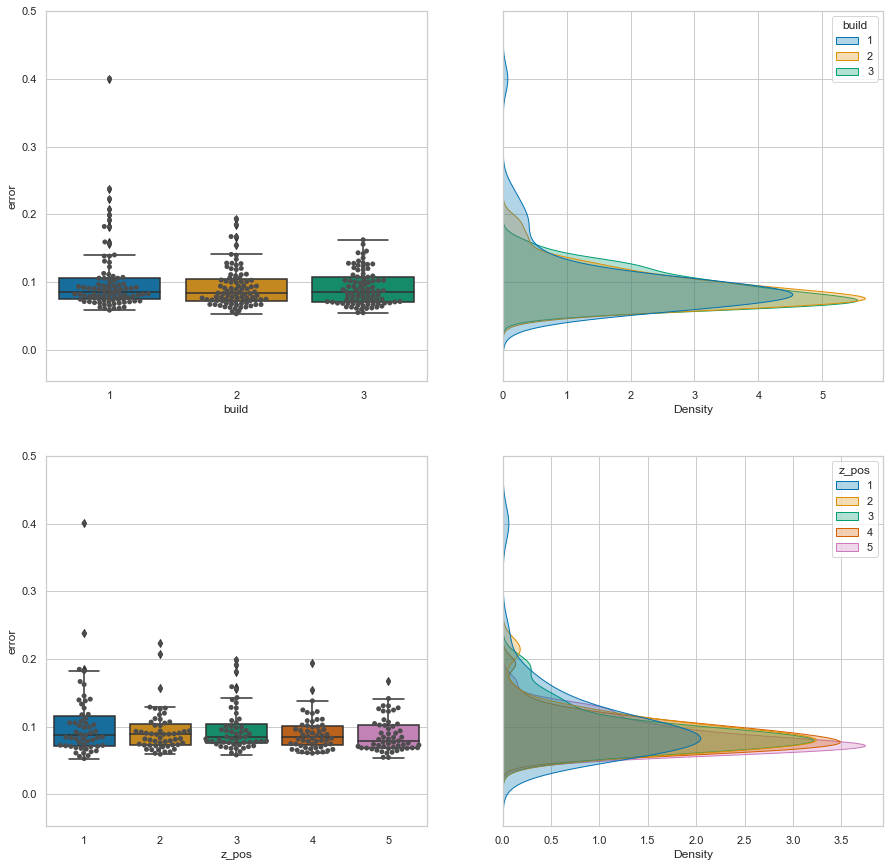

In [11]:
"""
Comparison of vertical planes of all positions

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Create figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey=True)

# Set a theme
sns.set_theme(style="whitegrid")


## Plot data
# 1st plot: Boxplot of builds with an overlay of swarmplot
sns.boxplot(ax=axes[0, 0], data=df, x='build', y='error', palette='colorblind')
sns.swarmplot(ax=axes[0, 0], data=df, x='build', y='error', color='.3')

# 2nd plot: Kernel Density Estimation of the different builds
sns.kdeplot(ax=axes[0, 1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind')

#3rd plot: Boxplot of the z-levels with an overlay of swarmplot
sns.boxplot(ax=axes[1, 0], data=df, x='z_pos', y='error', palette='colorblind')
sns.swarmplot(ax=axes[1, 0], data=df, x='z_pos', y='error', color='.3')

#4th plot: Kernel Density Estimation of the z-levels
sns.kdeplot(ax=axes[1, 1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind')


# Save figure
#plt.savefig('plots/Vertical_flatness_overview.png', dpi=300, transparent=False, bbox_inches='tight')

# Display plot
plt.show()

In [12]:
"""
T-test for vertical planes accross builds.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Isolate anchors
#df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Remove redundant columns and reset index
df = df.reset_index()[['char', 'build', 'z_pos', 'error']]


## Perform T-test
p_vals = func.get_p_vals(df, 'build')

# Display result from T-test
p_vals

,1,2,3
1,NaN,0.836123,0.903883
2,0.836123,NaN,0.908112
3,0.903883,0.908112,NaN


In [13]:
"""
Create dataframe where the three builds are columns to enable analysis of variance accross builds.

"""


## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Define list of strings to simplify column selection
builds = ['build 1', 'build 2', 'build 3']

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Set and 'part index' as index and sort accordingly
df = df.set_index('part_index').sort_index()

# Split df into a list with one dataframes for each build
df_builds = [df.loc[df['build'] == i] for i in range(1, 4)]

# Rename the error column to reflect build number
for i in range(3): df_builds[i] = df_builds[i].rename(columns={'error': 'build {}'.format(i + 1)}).drop(columns=['build'])

# Concatinate the list of dataframes back into a single dataframe
df_b = pd.concat(df_builds, axis=1)

# Remove duplicate columns
df_b = df_b.loc[:,~df_b.columns.duplicated()]

# Move column for 'build 1' to the others
df_b.insert(8, 'build 1', df_b.pop('build 1'))

# Calculate and insert mean
df_b['mean'] = df_b[builds].mean(axis=1)

# Calculate and insert median
df_b['median'] = df_b[builds].median(axis=1)

# Calculate and insert difference between minimum and maximum
df_b['diff'] = df_b[builds].max(axis=1) - df_b[builds].min(axis=1)

# Shorten char name by removing 'flatness' from the entry
df_b.loc[df_b['char'] == 'Flatness_HX2_Plane2', 'char'] = 'HX2_Plane2'
df_b.loc[df_b['char'] == 'Flatness_HX2_Plane5', 'char'] = 'HX2_Plane5'

# Display the first 10 rows of the dataframe
df_b.head(10)

,char,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z,build 1,build 2,build 3,mean,median,diff
part_index,,,,,,,,,,,,,,
1,HX2_Plane2,1,1,1,70,70,70,50.88,0.084595,0.105779,0.069072,0.086482,0.084595,0.036706
1,HX2_Plane5,1,1,1,70,70,70,50.88,0.099434,0.118279,0.083881,0.100531,0.099434,0.034397
2,HX2_Plane5,2,1,1,140,170,70,50.88,0.087820,0.062995,0.079049,0.076621,0.079049,0.024826
2,HX2_Plane2,2,1,1,140,170,70,50.88,0.076693,0.052950,0.067951,0.065864,0.067951,0.023742
3,HX2_Plane5,3,1,1,-90,270,70,50.88,0.071819,0.072636,0.162345,0.102267,0.072636,0.090526
3,HX2_Plane2,3,1,1,-90,270,70,50.88,0.090747,0.057378,0.073944,0.074023,0.073944,0.033369
4,HX2_Plane2,1,2,1,145,70,170,50.88,0.088876,0.070989,0.127601,0.095822,0.088876,0.056612
4,HX2_Plane5,1,2,1,145,70,170,50.88,0.181935,0.072349,0.092087,0.115457,0.092087,0.109587
5,HX2_Plane2,2,2,1,165,170,170,50.88,0.061222,0.056199,0.085149,0.067523,0.061222,0.028949


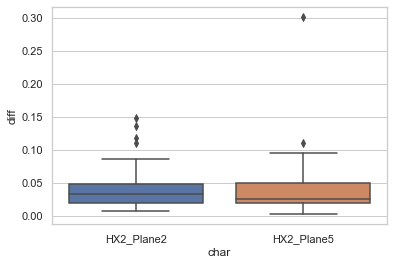

In [14]:
"""
Quick look at the distributions by boxplots

"""

# Boxplot plane 2 vs plane 5 using Seaborn
sns.boxplot(data=df_b, x='char', y='diff')

# Display plot
plt.show()

In [15]:
"""
Get a statistical description of the dataframe

"""

# Describe select columns
df_b[builds + ['mean', 'diff']].describe()

,build 1,build 2,build 3,mean,diff
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.100579,0.091916,0.091149,0.094548,0.040117
std,0.049281,0.028711,0.025326,0.026291,0.040889
min,0.058330,0.052950,0.054538,0.065753,0.002214
25%,0.074281,0.072488,0.070237,0.075634,0.019272
50%,0.084530,0.083260,0.085130,0.086795,0.027337
75%,0.105167,0.103796,0.107094,0.103580,0.049757
max,0.400476,0.193571,0.162345,0.211045,0.301388


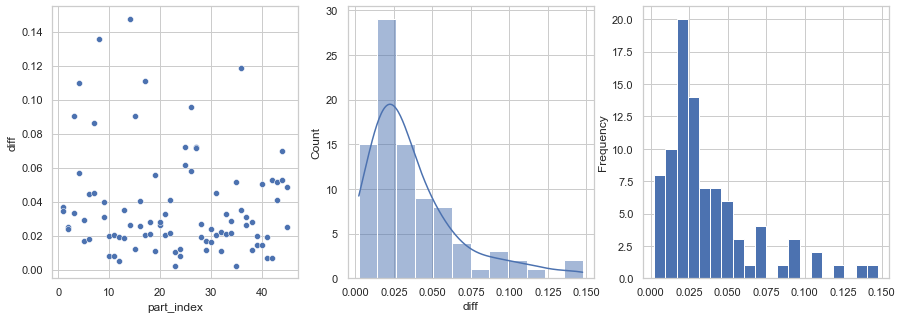

In [16]:
"""
Plot the diffrerences without the extreme outlier (Plane 5 at 0.3 mm)

"""

# Initiate figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Remove the outlier
df_1 = df_b[df_b['diff'] < df_b['diff'].max()]

# Extract column of interest
data = df_1['diff']

# PLOT 1: Scatterplot showing the difference between builds
sns.scatterplot(ax=ax[0], data=data)

# PLOT 2: Histogram with overlay of kernel density estimation
sns.histplot(ax=ax[1], data=data, kde=True)

# PLOT 3: Histogram with finer resolution
ax[2] = data.plot.hist(bins=20)

# Display plot
plt.show()

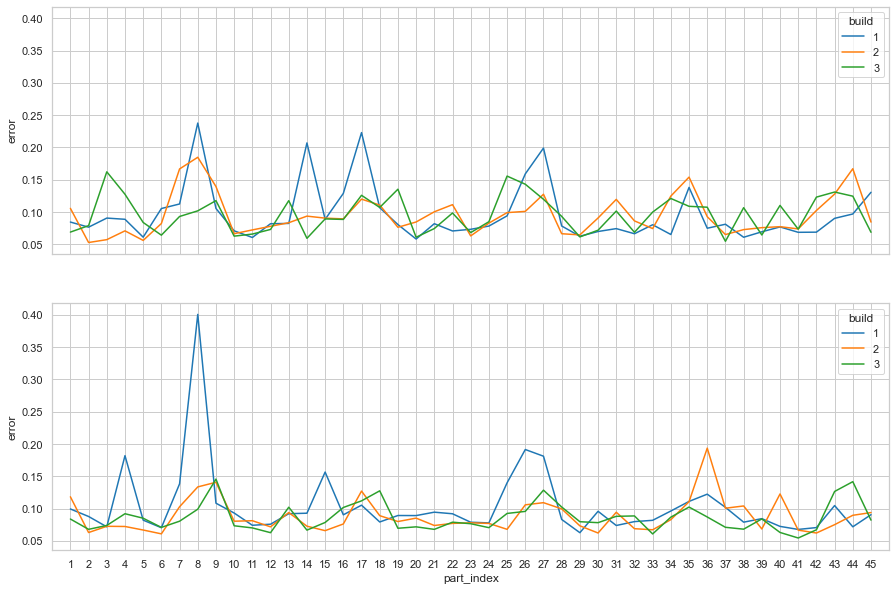

In [17]:
"""
Plot the measured error of HX2 planes 2 and 5 as lineplots.

"""

# Initiate figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True, sharey=True)

# PLOT 1: Lineplot for HX2_Plane2
sns.lineplot(data=df[df['char'] == 'Flatness_HX2_Plane2'], x='part_index', y='error', hue='build', ax=axs[0], palette='tab10')

# PLOT 2: Lineplot for HX2_Plane5
sns.lineplot(data=df[df['char'] == 'Flatness_HX2_Plane5'], x='part_index', y='error', hue='build', ax=axs[1], palette='tab10')

# Set ticks and range for both plots
for ax in axs:
    ax.set_xticks(np.linspace(1, 45, 45))
    ax.set_xlim(0, 46)
    
# Display plot
plt.show()

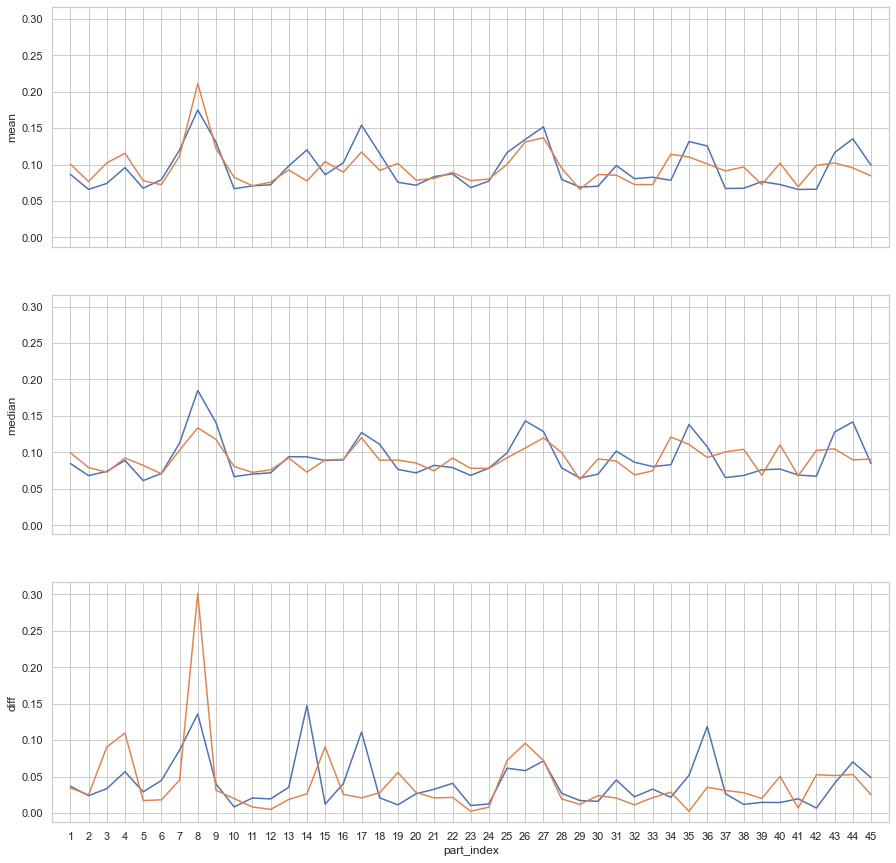

In [18]:
"""
Compare HX planes 2 and 5 with regards to mean, median and difference between min and max for the three builds

"""

# Initiate figure with two subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15), sharex=True, sharey=True)

# Extract planes 2 and 5 into separate dataframes
data1 = df_b[df_b['char'] == 'HX2_Plane2']
data2 = df_b[df_b['char'] == 'HX2_Plane5']

# Make three lineplots comparing planes 2 and 5 with regards to mean, median and difference between the three builds
for i in range(3):
    sns.lineplot(x=data1.index, y=data1.iloc[:,11+i], ax=axs[i])
    sns.lineplot(x=data2.index, y=data2.iloc[:,11+i], ax=axs[i])

    
# Set ticks and range for both plots
for ax in axs:
    ax.set_xticks(np.linspace(1, 45, 45))
    ax.set_xlim(0, 46)
    
# Display plots
plt.show()

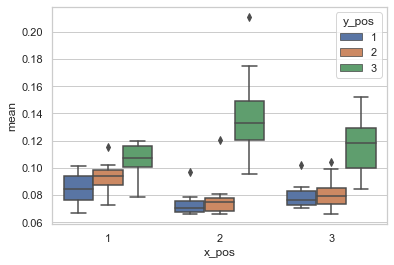

In [19]:
"""
Boxplot comparing characteristic build mean value and comparing the positions in the xy-plane

"""

# Boxplot using Seaborn
sns.boxplot(data=df_b, x='x_pos', y='mean', hue='y_pos')

# Display plot
plt.show()

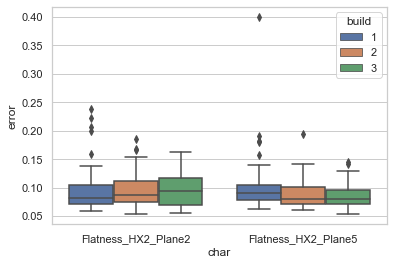

In [20]:
"""
Boxplot comparing the measured error in the three builds

"""

# Boxplot using Seaborn
sns.boxplot(data=df, x='char', y='error', hue='build')

# Display plot
plt.show()

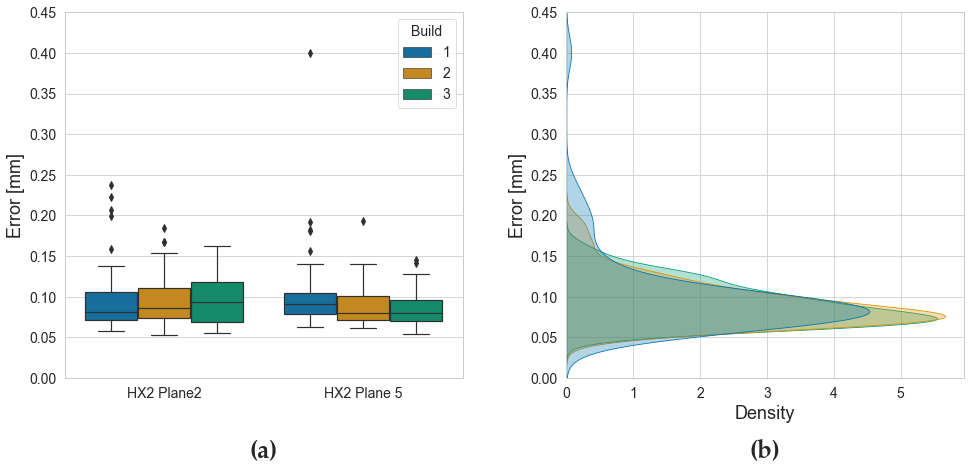

In [21]:
"""
Compare variation between builds for the vertical planes.

"""

# Seaborn theme
sns.set_theme(context='paper', style='whitegrid')

# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12

# Define font
pfont = {'fontname':'Palatino Linotype'}

# Initialize figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

# Configure layout spacing
fig.tight_layout(pad=8.0)

# Set context with Seaborn
sns.set_context('paper', font_scale=1.2)


## PLOT 1
# Boxplot for the first frame
sns.boxplot(ax=axs[0], data=df, x='char', y='error', hue='build', palette='colorblind')

# Place legend in upper right corner
axs[0].legend(loc='upper right', title="Build", title_fontsize=small, fontsize=small, fancybox=True, markerscale=2)

# Set label for the x-axis
axs[0].set_xlabel(None)

# Edit the text for the groups of boxplots
axs[0].set_xticklabels(["HX2 Plane2", "HX2 Plane 5"])

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(a)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[0].transAxes)


## PLOT 2
# Kernel density estimation for second frame
sns.kdeplot(ax=axs[1], data=df, y='error', hue='build', fill=True, alpha=.3, palette='colorblind', legend=False)

# Set the label for the x-axis
axs[1].set_xlabel("Density", fontsize=medium)

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(b)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[1].transAxes)


for ax in axs:
    # Set label for y-axis
    ax.set_ylabel("Error [mm]", fontsize=medium)
    
    # Set the label size for both axes
    ax.tick_params(labelsize=small)
    
    # Set the limits of the y-axis
    ax.set_ylim(ymin=0, ymax=0.45)


# Save figure
# plt.savefig("plots/40.0_Variation_between_builds_for_vertical_planes.jpg", dpi=300, bbox_inches='tight')

    
## Display plot
plt.show()